<a href="https://colab.research.google.com/github/MontMendez/EstadisticaVerano/blob/main/FertilizerPredictionP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PORTADA
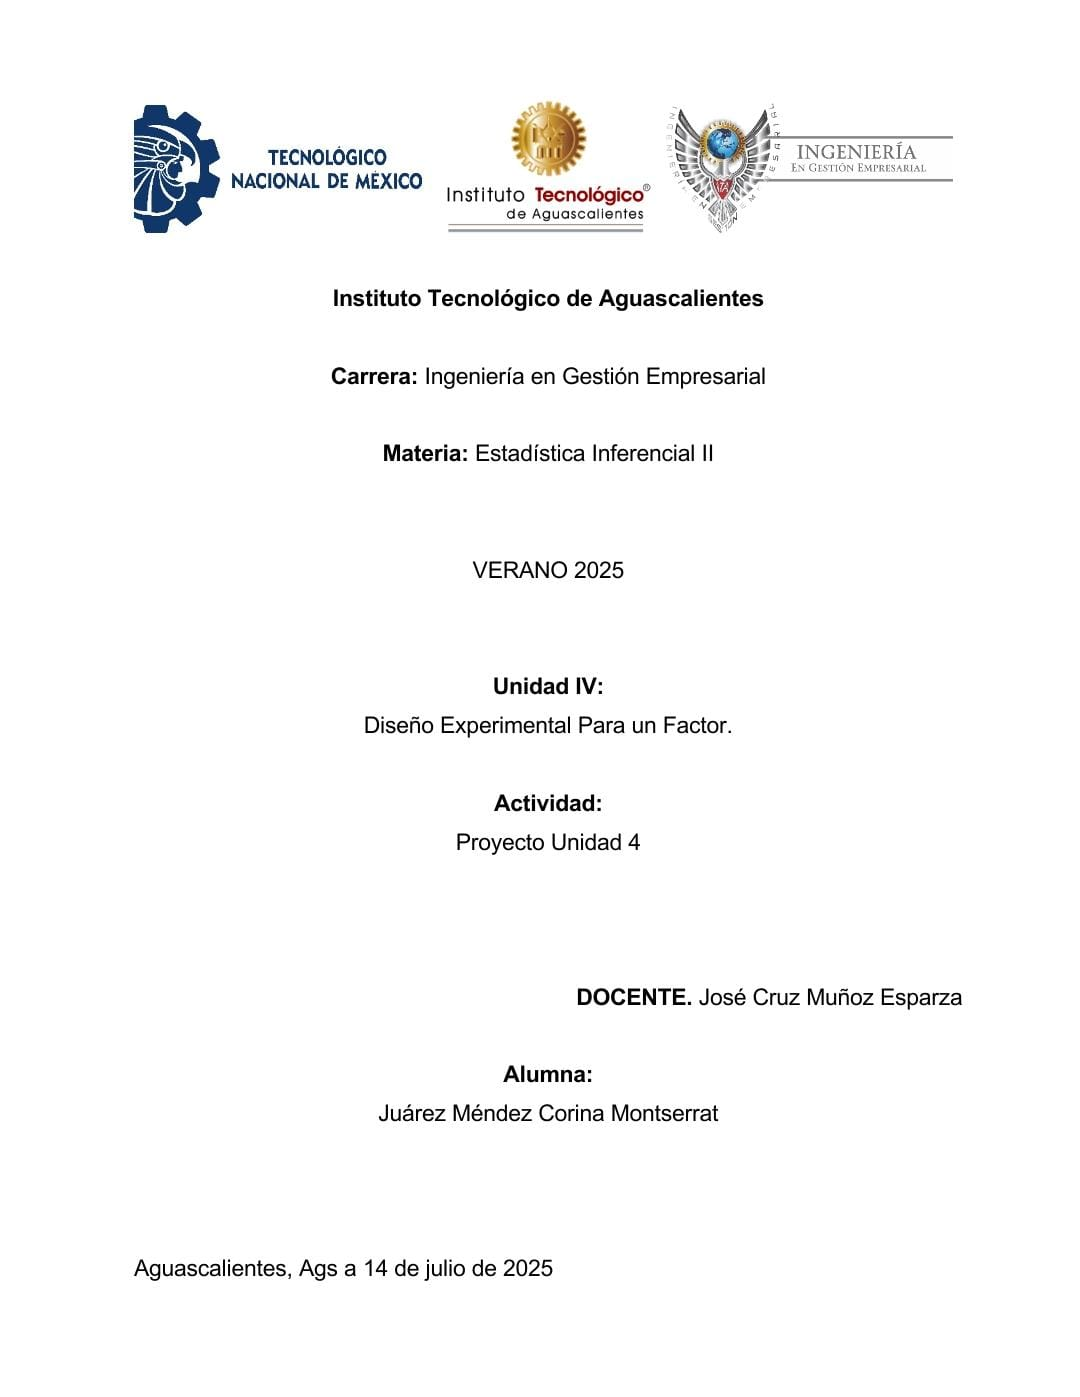

# INTRODUCCIÓN

El analisis de los factores y las variables de respuesta, son fundamentales en cualquier investigación y diseño experimental, ya que nos permite manipular el factor con el fin de ver la consecuencia en nuestra variable de respuesta. Esto quiere decir, ver la relación que hay entre variables.

Hoy y siempre, los cultivos son indispensables porque son la base de la agricultura, que esta es esencial para la alimentación de las personas su manutención y la salud de la población. La agricultura puede ayudar a reducir la pobreza, aumentar los ingresos y mejorar la seguridad alimentaria del 80 % de las personas en situación de pobreza que viven en zonas rurales.

Es por ello que, para que los cultivos tengan un mayor rendimiento es indispensable contar con uno de los insumos agrícolas, los cuales son los fertilizantes. Aunque también influira el tipo de cultivo en la humedad del suelo y este en la adhesión del fertilizante.

# MARCO TEÓRICO

Diseño experimental para un factor: es un método sistemático utilizado en estadística para evaluar las numerosas alternativas posibles en una o varias variables. Permite manipular varios factores de entrada para determinar qué efecto podrían tener para obtener el resultado deseado o mejorar el resultado.

Según Herrera (2016), variable es una palabra que representa aquello que esta sujeto a algún tipo de cambio.

Los factores son variables que se pueden manipular (variable independiente), y la variable de respuesta es la consecuencia del factor (variable dependiente).


PRUEBAS DE HIPOTESIS

ANOVA: es utilizada para saber si hay o no relación entre variables.

      Ho: No hay relación entre variables, grupos iguales
      Hi: Hay relación entre variables, al menos un grupo es diferente.

Shapiro: utilizado para comprobar si hay normalidad

      Ho: Hay normalidad
      Hi: No hay normalidad

Levene: Utilizado para comprobar si hay homoscedasticidad

      Ho: Hay homoscedasticidad
      Hi: Hay heteroscedasticidad

Boxcox: Es un método utilizado en caso de que alguno de los supuestos anteriores (normalidad y homoscedasticidad) no se cumpla.

Tukey: Es utilizado para realizar comparaciones entre pares de grupos, de forma visual. Se grafica para saber si hay o no diferencia significativa entre grupos.

Eta cuadrada (n2): es una estimación del tamaño del efecto

# METODOLOGÍA

Se busca una base de datos en la plataforma kaggle, el cual se pasara a colab en datos crudos, o valores separados por comas, para poder aplicar el diseño experimental.

## importación datos

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/MontMendez/EstadisticaVerano/refs/heads/main/Fertilizer%20Prediction.csv")
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


Despues se plasman las columnas existentes en nuestra base de datos y cambiamos el nombre para evitar cualquier error al ejecutar los códigos.

In [ ]:
df.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [ ]:
df = df[['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name']]
df.columns = ['Temparature', 'Humidity', 'Moisture', 'Soil_Type', 'Crop_Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer_Name']
df

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer_Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


Se ve la información para saber si las columnas y las filas tienen todos los datos y no tener sesgo de datos.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil_Type        99 non-null     object
 4   Crop_Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer_Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


A las variables numericas se les hizo histograma, en cambio a las variables categoricas se les realizo anova, shapiro y levene. Si no se cumple con los supuestos de normalidad o de homoscedasticidad se aplico boxcox con el fin de mejorar el modelo.

Finalmente se aplico n2 eta cuadrada para conocer el tamaño del efecto.

# RESULTADOS

## Temparature  

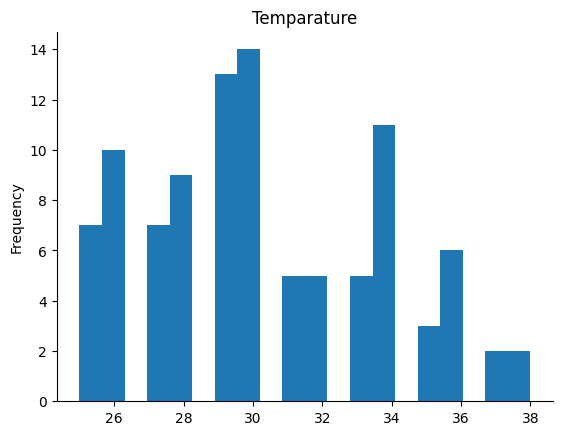

In [ ]:
from matplotlib import pyplot as plt
df['Temparature'].plot(kind='hist', bins=20, title='Temparature')
plt.gca().spines[['top', 'right',]].set_visible(False)

Variable numerica discreta que no presenta datos altipicos

## Humidity

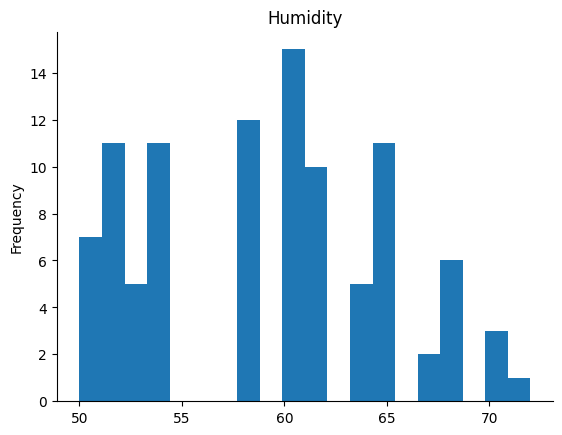

In [ ]:
from matplotlib import pyplot as plt
df['Humidity'].plot(kind='hist', bins=20, title='Humidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

Variable numerica discreta que no presenta datos altipicos

## Moisture

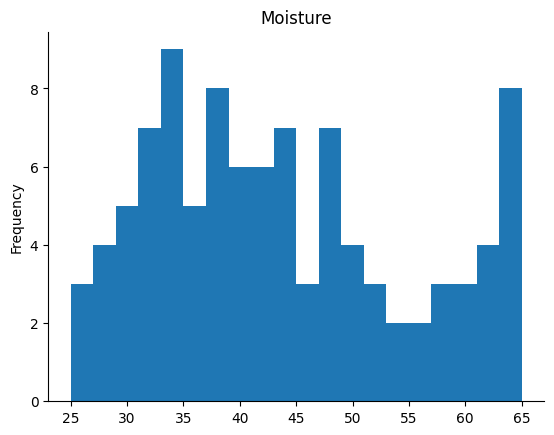

In [ ]:
from matplotlib import pyplot as plt
df['Moisture'].plot(kind='hist', bins=20, title='Moisture')
plt.gca().spines[['top', 'right',]].set_visible(False)

Variable numerica continua que no tiene datos altipicos

## Soil_Type

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('Moisture ~ C(Soil_Type)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho: no hay relación entre variables
#Hi: si hay relación entre variables
#alpha= 0.05

,df,sum_sq,mean_sq,F,PR(>F)
C(Soil_Type),4.0,2261.288050,565.322012,5.21523,0.000773
Residual,94.0,10189.439223,108.398290,NaN,NaN


Se rechaza ho, por lo tanto hay relación entre variables. Hay diferencia en al menos un grupo.

valor-p (Shapiro) = 0.06592234785211663


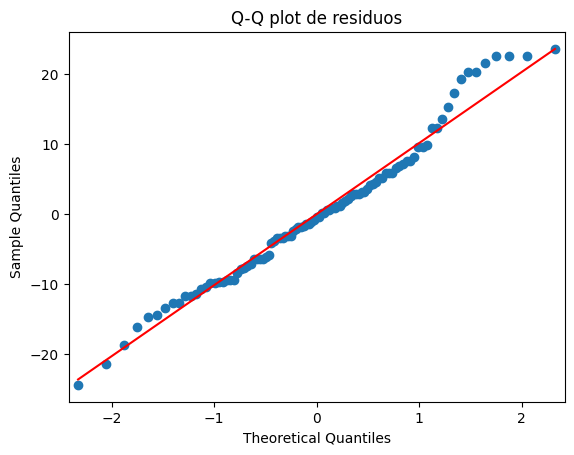

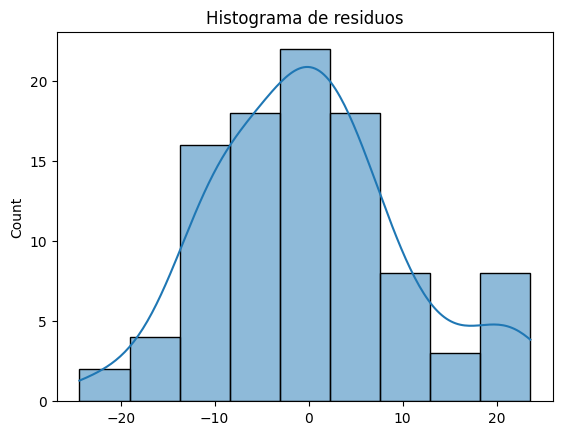

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

Hay normalidad

In [ ]:
df['Soil_Type'].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['Soil_Type'] == 'Sandy']['Moisture']
grupo2 = df[df['Soil_Type'] == 'Loamy']['Moisture']
grupo3 = df[df['Soil_Type'] == 'Black']['Moisture']
grupo4 = df[df['Soil_Type'] == 'Red']['Moisture']
grupo5 = df[df['Soil_Type'] == 'Clayey']['Moisture']
stat, p = levene(grupo1, grupo2, grupo3, grupo4, grupo5)
print(f"p-valor de Levene: {p}")
#Ho: homoscedasticidad
#Hi: heteroscedasticidad
#alpha= 0.05

p-valor de Levene: 0.004265640352233693


Se rechaza ho, hay heteroscedasticidad

Lambda óptimo: -0.12981758562285856


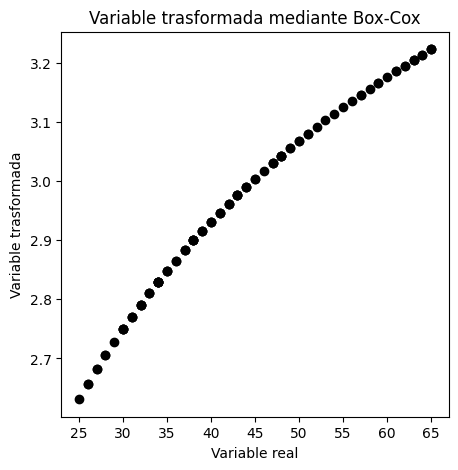

In [ ]:
#si no se cumple con el supuesto de normalidad o de homoscedasticidad
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0
df["Moisture_boxcox"], lambda_opt = boxcox(df["Moisture"])
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df["Moisture"], df["Moisture_boxcox"], color = "black")
plt.title("Variable trasformada mediante Box-Cox")
plt.xlabel("Variable real")
plt.ylabel("Variable trasformada")
plt.show()

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('Moisture_boxcox ~ C(Soil_Type)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho: no hay relación entre variables
#Hi: si hay relación entre variables
#alpha= 0.05

,df,sum_sq,mean_sq,F,PR(>F)
C(Soil_Type),4.0,0.429491,0.107373,4.861354,0.001315
Residual,94.0,2.076179,0.022087,NaN,NaN


Se rechaza ho, hay relación entre variables.

valor-p (Shapiro) = 0.3370760217305259


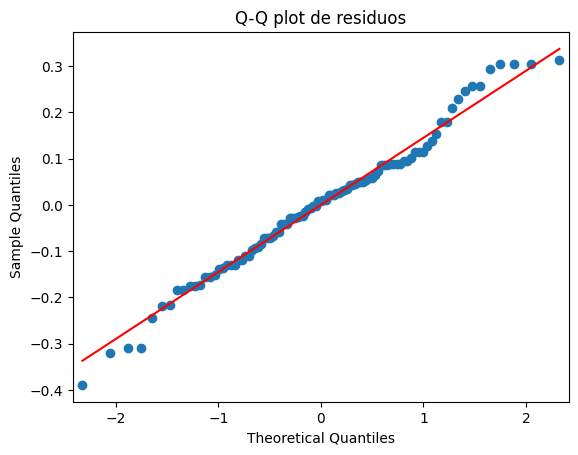

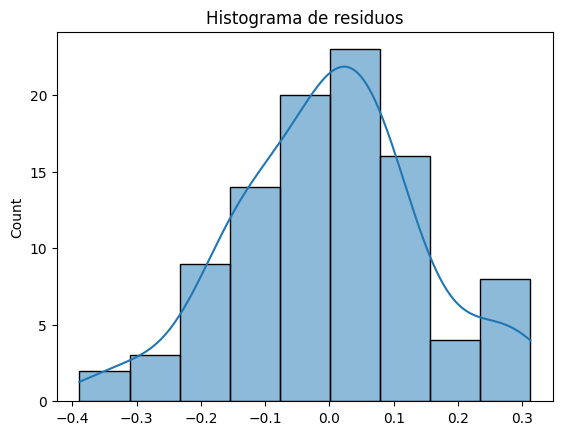

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['Soil_Type'] == 'Sandy']['Moisture_boxcox']
grupo2 = df[df['Soil_Type'] == 'Loamy']['Moisture_boxcox']
grupo3 = df[df['Soil_Type'] == 'Black']['Moisture_boxcox']
grupo4 = df[df['Soil_Type'] == 'Red']['Moisture_boxcox']
grupo5 = df[df['Soil_Type'] == 'Clayey']['Moisture_boxcox']
stat, p = levene(grupo1, grupo2, grupo3, grupo4, grupo5)
print(f"p-valor de Levene: {p}")
#Ho: homoscedasticidad
#Hi: heteroscedasticidad
#alpha= 0.05

p-valor de Levene: 0.004973272990233017


Se rechaza ho, sigue habiendo heteroscedasticidad

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 Black Clayey  -0.0778 0.4803 -0.2102  0.0547  False
 Black  Loamy   0.1037 0.1873 -0.0272  0.2346  False
 Black    Red  -0.0659 0.6503    -0.2  0.0682  False
 Black  Sandy   -0.026 0.9822 -0.1584  0.1064  False
Clayey  Loamy   0.1815 0.0016  0.0523  0.3106   True
Clayey    Red   0.0119 0.9991 -0.1206  0.1443  False
Clayey  Sandy   0.0517 0.8056  -0.079  0.1825  False
 Loamy    Red  -0.1696 0.0045 -0.3005 -0.0387   True
 Loamy  Sandy  -0.1297 0.0484 -0.2589 -0.0006   True
   Red  Sandy   0.0399 0.9181 -0.0925  0.1723  False
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

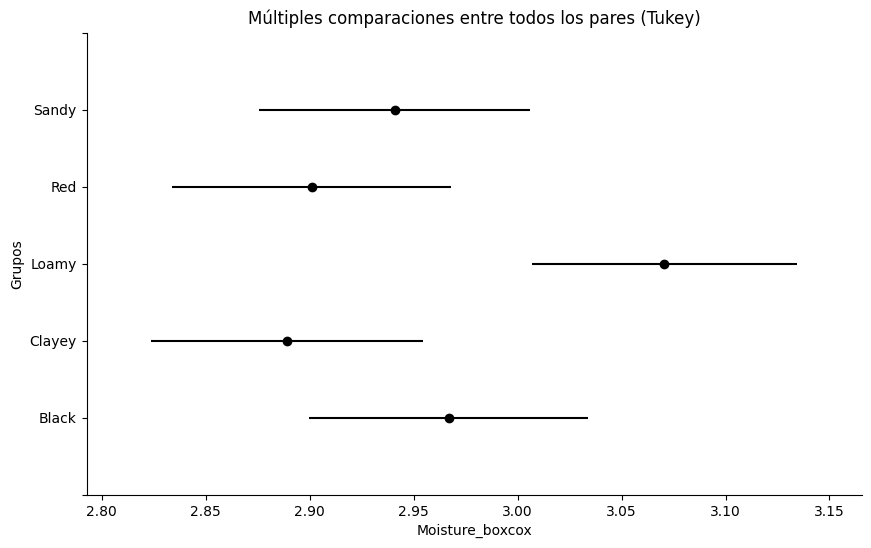

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Moisture_boxcox'], groups=df['Soil_Type'],
                          alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Moisture_boxcox")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Si hay diferencia entre grupos.

In [ ]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(Soil_Type)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")
#MEDIR EL TAMAÑO DEL EFECTO ES CASI IGUAL AL COEF DE DETERMINACION r2

η² (tamaño de efecto): 0.171


En esta variable ANOVA nos indica que si hay relación entre variables pero se encuentra que hay normalidad pero no homoscedasticidad. Así mismo tukey nos muestra que efectivamente, hay diferencia en al menos uno de los grupos. Y eta cuadrada nos muestra un tamaño de efecto no tan deseado.

## Crop_Type

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('Moisture ~ C(Crop_Type)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho: no hay relación entre variables
#Hi: si hay relación entre variables
#alpha= 0.05

,df,sum_sq,mean_sq,F,PR(>F)
C(Crop_Type),10.0,9659.550549,965.955055,30.454555,1.929494e-24
Residual,88.0,2791.176723,31.717917,NaN,NaN


Se rechaza ho, hay relación entre variables. Hay diferencia en al menos un grupo.

valor-p (Shapiro) = 7.51523538732605e-08


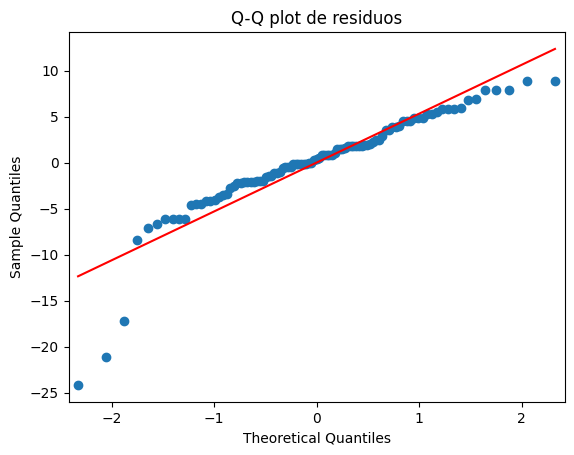

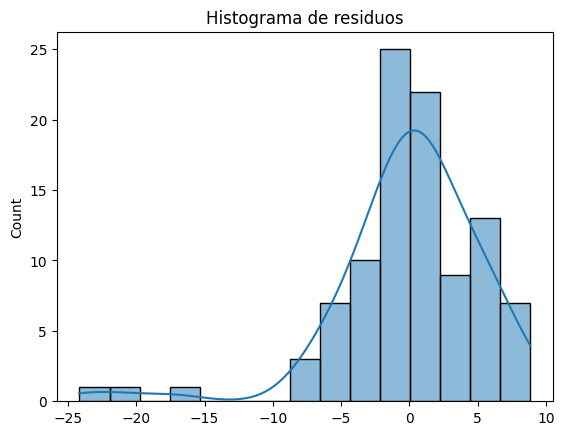

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [ ]:
df["Crop_Type"].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['Crop_Type'] == 'Maize']['Moisture']
grupo2 = df[df['Crop_Type'] == 'Sugarcane']['Moisture']
grupo3 = df[df['Crop_Type'] == 'Cotton']['Moisture']
grupo4 = df[df['Crop_Type'] == 'Tobacco']['Moisture']
grupo5 = df[df['Crop_Type'] == 'Paddy']['Moisture']
grupo6 = df[df['Crop_Type'] == 'Barley']['Moisture']
grupo7 = df[df['Crop_Type'] == 'Wheat']['Moisture']
grupo8 = df[df['Crop_Type'] == 'Millets']['Moisture']
grupo9 = df[df['Crop_Type'] == 'Oil seeds']['Moisture']
grupo10 = df[df['Crop_Type'] == 'Pulses']['Moisture']
grupo11 = df[df['Crop_Type'] == 'Ground Nuts']['Moisture']

stat, p = levene(grupo1, grupo2, grupo3, grupo4, grupo5, grupo6, grupo7, grupo8,
                 grupo9, grupo10, grupo11)
print(f"p-valor de Levene: {p}")
#Ho: homoscedasticidad
#Hi: heteroscedasticidad

p-valor de Levene: 0.0518907047339122


No se rechaza ho, hay homoscedasticidad.

Lambda óptimo: -0.12981758562285856


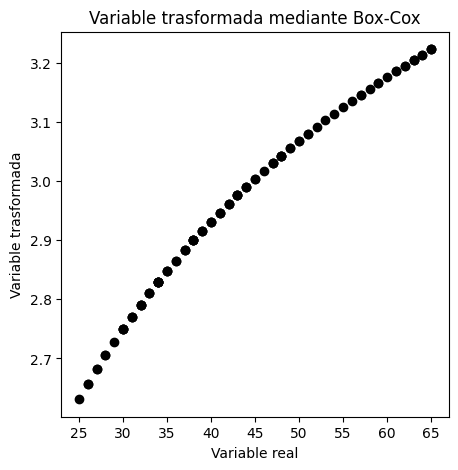

In [ ]:
#si no se cumple con el supuesto de normalidad o de homoscedasticidad
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0
df["Moisture_boxcox"], lambda_opt = boxcox(df["Moisture"])
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df["Moisture"], df["Moisture_boxcox"], color = "black")
plt.title("Variable trasformada mediante Box-Cox")
plt.xlabel("Variable real")
plt.ylabel("Variable trasformada")
plt.show()

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('Moisture_boxcox ~ C(Crop_Type)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho: no hay relación entre variables
#Hi: si hay relación entre variables
#alpha= 0.05

,df,sum_sq,mean_sq,F,PR(>F)
C(Crop_Type),10.0,1.775287,0.177529,21.389486,1.412797e-19
Residual,88.0,0.730383,0.008300,NaN,NaN


Hay relación entre variables.

valor-p (Shapiro) = 3.8988686636253045e-08


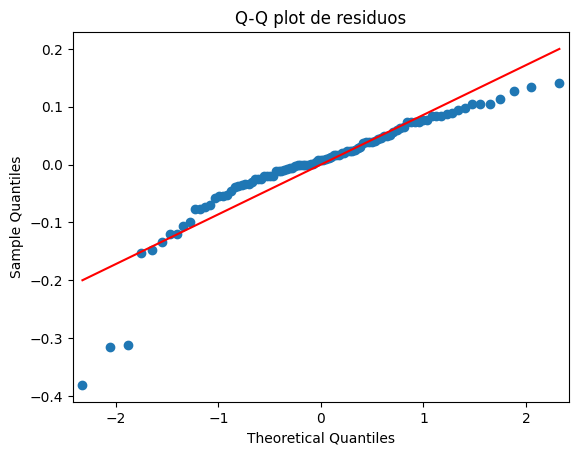

Text(0.5, 1.0, 'Histograma de residuos')

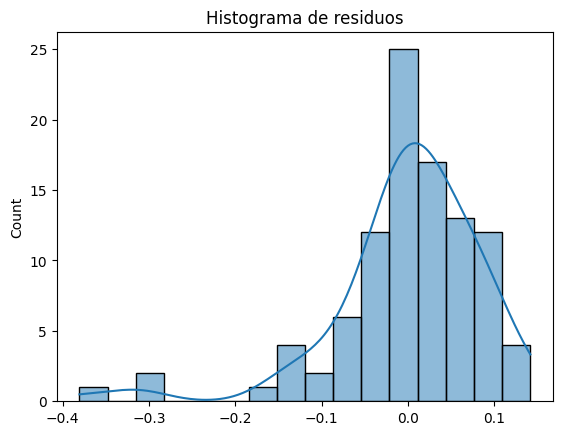

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")

In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['Crop_Type'] == 'Maize']['Moisture_boxcox']
grupo2 = df[df['Crop_Type'] == 'Sugarcane']['Moisture_boxcox']
grupo3 = df[df['Crop_Type'] == 'Cotton']['Moisture_boxcox']
grupo4 = df[df['Crop_Type'] == 'Tobacco']['Moisture_boxcox']
grupo5 = df[df['Crop_Type'] == 'Paddy']['Moisture_boxcox']
grupo6 = df[df['Crop_Type'] == 'Barley']['Moisture_boxcox']
grupo7 = df[df['Crop_Type'] == 'Wheat']['Moisture_boxcox']
grupo8 = df[df['Crop_Type'] == 'Millets']['Moisture_boxcox']
grupo9 = df[df['Crop_Type'] == 'Oil seeds']['Moisture_boxcox']
grupo10 = df[df['Crop_Type'] == 'Pulses']['Moisture_boxcox']
grupo11 = df[df['Crop_Type'] == 'Ground Nuts']['Moisture_boxcox']

stat, p = levene(grupo1, grupo2, grupo3, grupo4, grupo5, grupo6, grupo7, grupo8,
                 grupo9, grupo10, grupo11)
print(f"p-valor de Levene: {p}")
#Ho: homoscedasticidad
#Hi: heteroscedasticidad

p-valor de Levene: 0.11440902497784404


Hay homoscedasticidad

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
     Barley      Cotton   0.2524    0.0  0.1092  0.3956   True
     Barley Ground Nuts  -0.1487 0.0968 -0.3096  0.0122  False
     Barley       Maize   -0.008    1.0 -0.1755  0.1595  False
     Barley     Millets  -0.0511 0.9851 -0.1967  0.0945  False
     Barley   Oil seeds  -0.1624 0.0459 -0.3234 -0.0015   True
     Barley       Paddy   -0.001    1.0 -0.1494  0.1474  False
     Barley      Pulses  -0.1277  0.159 -0.2761  0.0207  False
     Barley   Sugarcane   0.1087 0.2944 -0.0325  0.2498  False
     Barley     Tobacco  -0.1731 0.0243 -0.3341 -0.0122   True
     Barley       Wheat   0.1135 0.3347 -0.0382  0.2653  False
     Cotton Ground Nuts  -0.4011    0.0 -0.5443 -0.2579   True
     Cotton       Maize  -0.2604    0.0  -0.411 -0.1099   True
     Cotton     Millets  -0.3035    0.0 -0.4292 -0.1778

Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

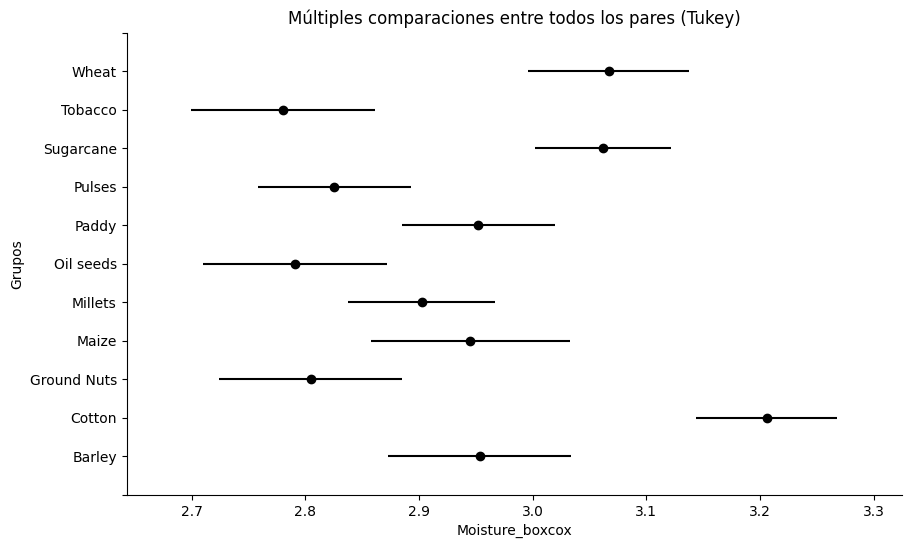

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Moisture_boxcox'], groups=df['Crop_Type'],
                          alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Moisture_boxcox")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Si hay diferencia entre grupos

In [ ]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(Crop_Type)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")
#MEDIR EL TAMAÑO DEL EFECTO ES CASI IGUAL AL COEF DE DETERMINACION r2

η² (tamaño de efecto): 0.709


En esta variable ANOVA nos indica que si hay relación entre variables pero se encuentra que hay no normalidad y si hay homoscedasticidad. Así mismo tukey nos muestra que efectivamente, hay diferencia en al menos uno de los grupos. Y eta cuadrada nos muestra un tamaño de efecto excelente.

## Nitrogen

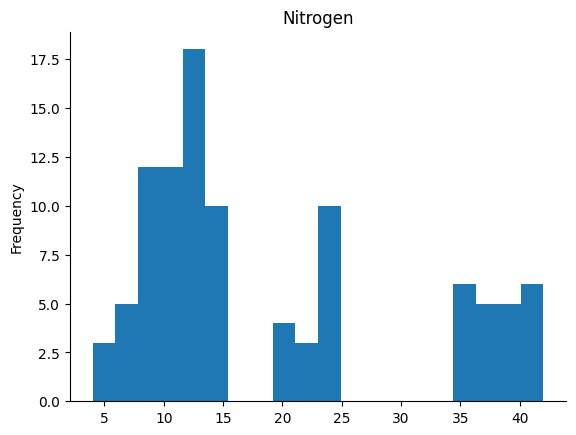

In [ ]:
from matplotlib import pyplot as plt
df['Nitrogen'].plot(kind='hist', bins=20, title='Nitrogen')
plt.gca().spines[['top', 'right',]].set_visible(False)

Variable numerica discreta

## Potassium

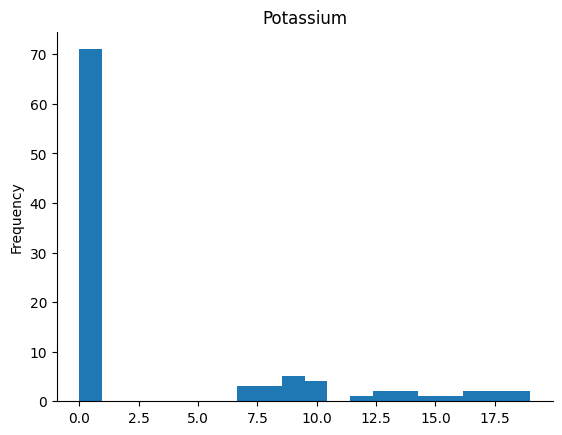

In [ ]:
from matplotlib import pyplot as plt
df['Potassium'].plot(kind='hist', bins=20, title='Potassium')
plt.gca().spines[['top', 'right',]].set_visible(False)

Variable numerica discreta

## Phosphorous

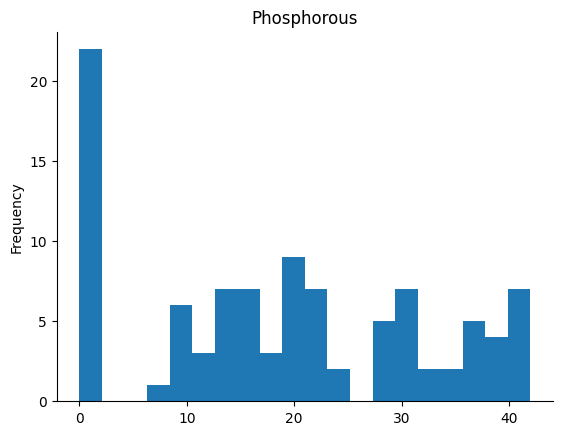

In [ ]:
from matplotlib import pyplot as plt
df['Phosphorous'].plot(kind='hist', bins=20, title='Phosphorous')
plt.gca().spines[['top', 'right',]].set_visible(False)

Variable numerica discreta

## Fertilizer_Name

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('Moisture ~ C(Fertilizer_Name)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho: no hay relación entre variables
#Hi: si hay relación entre variables
#alpha= 0.05

,df,sum_sq,mean_sq,F,PR(>F)
C(Fertilizer_Name),6.0,401.053773,66.842296,0.510345,0.799115
Residual,92.0,12049.673500,130.974712,NaN,NaN


No se rechaza ho, no hay relación entre variables.

valor-p (Shapiro) = 0.016848093172381055


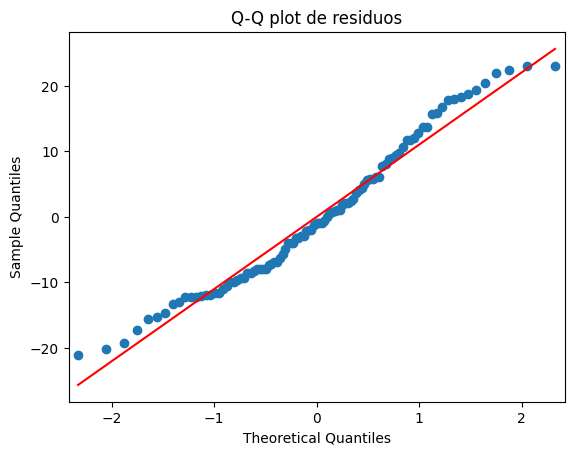

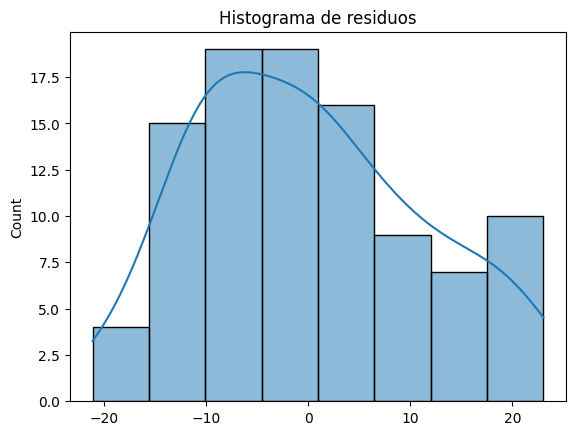

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [ ]:
df["Fertilizer_Name"].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['Fertilizer_Name'] == 'Urea']['Moisture']
grupo2 = df[df['Fertilizer_Name'] == 'DAP']['Moisture']
grupo3 = df[df['Fertilizer_Name'] == '14-35-14']['Moisture']
grupo4 = df[df['Fertilizer_Name'] == '28-28']['Moisture']
grupo5 = df[df['Fertilizer_Name'] == '17-17-17']['Moisture']
grupo6 = df[df['Fertilizer_Name'] == '20-20']['Moisture']
grupo7 = df[df['Fertilizer_Name'] == '10-26-26']['Moisture']

stat, p = levene(grupo1, grupo2, grupo3, grupo4, grupo5, grupo6, grupo7)
print(f"p-valor de Levene: {p}")
#Ho: homoscedasticidad
#Hi: heteroscedasticidad

p-valor de Levene: 0.18213358526395043


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower    upper  reject
---------------------------------------------------------
10-26-26 14-35-14   5.9286 0.9207 -10.0418  21.899  False
10-26-26 17-17-17   7.8571 0.8574 -10.5839 26.2982  False
10-26-26    20-20      6.0 0.9164  -9.9704 21.9704  False
10-26-26    28-28   2.6555 0.9986 -12.8381  18.149  False
10-26-26      DAP   3.3254 0.9947 -12.0421 18.6929  False
10-26-26     Urea   2.6688 0.9982 -12.3024 17.6401  False
14-35-14 17-17-17   1.9286 0.9998 -14.0418  17.899  False
14-35-14    20-20   0.0714    1.0 -12.9683 13.1112  False
14-35-14    28-28  -3.2731 0.9852 -15.7243  9.1781  False
14-35-14      DAP  -2.6032 0.9953 -14.8972  9.6908  False
14-35-14     Urea  -3.2597 0.9808 -15.0547  8.5352  False
17-17-17    20-20  -1.8571 0.9998 -17.8275 14.1133  False
17-17-17    28-28  -5.2017   0.95 -20.6952 10.2919  False
17-17-17      DAP  -4.5317 0.9734 -19.8993 10.8358  False
17-17-17     U

Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

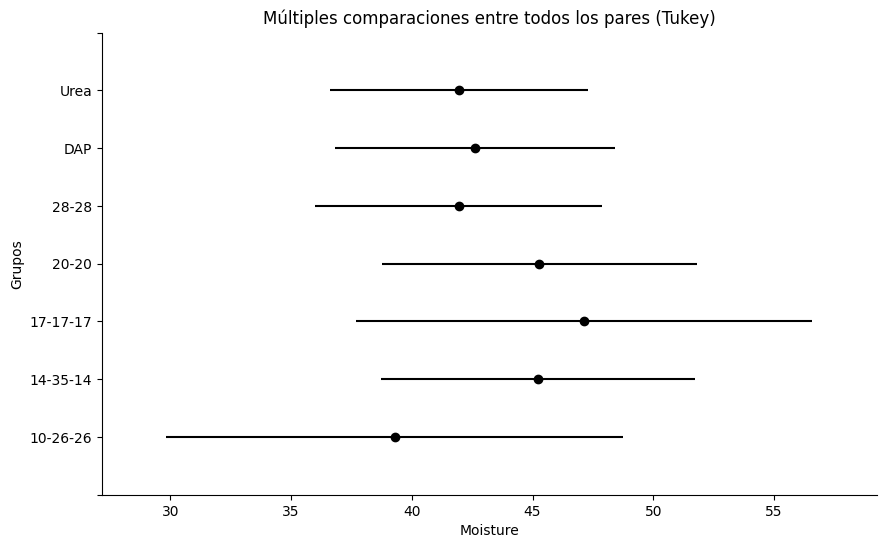

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Moisture'], groups=df['Fertilizer_Name'],
                          alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Moisture")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

No hay diferencia significativa entre grupos.

In [ ]:
df = df.drop(columns=["Fertilizer_Name"])
df

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Moisture_boxcox
0,26,52,38,0,0,37,0,0,2.899340
1,29,52,45,1,1,12,0,36,3.003630
2,34,65,62,2,2,7,9,30,3.195131
3,32,62,34,3,3,22,0,20,2.829475
4,28,54,46,4,4,35,0,0,3.017020
...,...,...,...,...,...,...,...,...,...
94,25,50,32,4,9,24,0,19,2.790968
95,30,60,27,3,3,4,17,17,2.681422
96,38,72,51,1,6,39,0,0,3.079372
97,36,60,43,0,7,15,0,41,2.975813


In [ ]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(Fertilizer_Name)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")
#MEDIR EL TAMAÑO DEL EFECTO ES CASI IGUAL AL COEF DE DETERMINACION r2

η² (tamaño de efecto): 0.032


En esta variable ANOVA nos indica que no hay relación entre variables. Y al realizar tukey nos muestra que efectivamente, no hay diferencia entre grupos. Y eta cuadrada nos muestra un tamaño de efecto no deseado.

# CONCLUSIÓN

In [ ]:
#Factor "Crop_Type"
#Variable de respuesta "Moisture"

Anova nos muestra que hay relación entre variables por lo que el tipo de cultivo influye significativamente en los niveles de humedad del suelo, esto se debe a que algunos cultivos requieren de más humedad para poder desarrollarse y otros de menos.

En base a tukey nos podemos dar cuenta que Tobacco, Pulses, Oil seeds, Millets, Maize y ground Nuts no tienen diferencia significativa a lo que se puede entender que ocupan de suelos menos humedos que el resto de grupos o cultivos.

Este diseño muestra que el tipo de cultivo tiene un efecto sobre la humedad del suelo, asi pues como mencione con antelación, puede deberse a diferencias en la absorción de agua o la necesidad de hidratación de cada cultivo y la profundidad de raíces.

Este modelo puede ser útil para empresas agrícolas, para proveedores de insumos y alimentos, o incluso para lugares o personas que practican la agricultura. Con el fin de llevar este modelo a ser útil para optimizar el riego o la fertilización según el tipo de cultivo que desee la persona que le interese aplicarlo.

# REFERENCIAS

Agricultura y el Grupo Banco Mundial. (s. f.). World Bank. https://www.bancomundial.org/es/topic/agriculture/overview

De Agricultura y Desarrollo Rural, S. (s. f.). ¿Qué es y para qué sirve el fertilizante? gob.mx. https://www.gob.mx/agricultura/articulos/que-es-y-para-que-sirve-el-fertilizante

Diseño experimental o de experimentos (DoE) | SafetyCulture. (2025b, febrero 4). SafetyCulture. https://safetyculture.com/es/temas/diseno-de-experimentos/